In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
bomn = pdr.get_data_yahoo('BOMN','2019-05-31')
bomn.drop('Adj Close', axis=1, inplace=True)
bomn.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-31,24.770000,23.812000,24.480000,24.129999,57600
2019-06-03,24.719999,23.209999,24.000000,24.510000,124900
2019-06-04,24.889999,24.011000,24.520000,24.450001,84000
2019-06-05,24.660000,23.700001,24.350000,24.270000,60500
2019-06-06,24.530001,23.730000,24.389999,24.260000,29400


In [2]:
bomn['3-day'] = bomn['Close'].rolling(3).mean()
bomn['9-day'] = bomn['Close'].rolling(9).mean()
bomn['21-day'] = bomn['Close'].rolling(21).mean()
bomn['Change'] = np.log(bomn.Close / bomn.Close.shift())
bomn.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change
Date,,,,,,,,,
2021-05-28,30.680000,29.540001,30.070000,30.660000,95600,30.029999,28.673333,27.750952,0.028451
2021-06-01,31.740000,30.530001,31.000000,31.590000,112900,30.683333,29.150000,27.920952,0.029882
2021-06-02,31.799999,30.230000,31.799999,30.490000,193600,30.913333,29.528889,28.021428,-0.035442
2021-06-03,30.590000,29.799999,30.299999,30.559999,63400,30.880000,29.808889,28.166666,0.002293
2021-06-04,31.219999,30.565001,31.000000,30.700001,89800,30.583333,30.087777,28.317143,0.004571


In [3]:
bomn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-05-31 to 2021-06-04
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    508 non-null    float64
 1   Low     508 non-null    float64
 2   Open    508 non-null    float64
 3   Close   508 non-null    float64
 4   Volume  508 non-null    int64  
 5   3-day   506 non-null    float64
 6   9-day   500 non-null    float64
 7   21-day  488 non-null    float64
 8   Change  507 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.7 KB


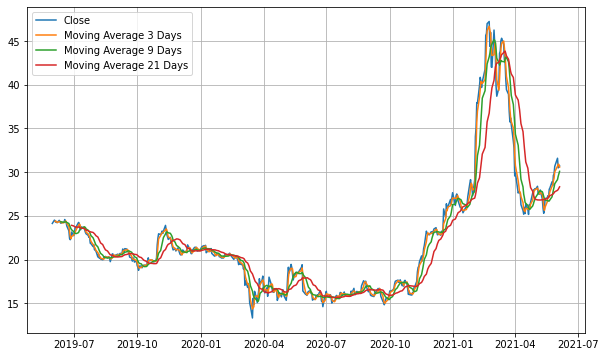

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'],label='Close')
plt.plot(bomn['3-day'],label='Moving Average 3 Days')
plt.plot(bomn['9-day'],label='Moving Average 9 Days')
plt.plot(bomn['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on the changing period

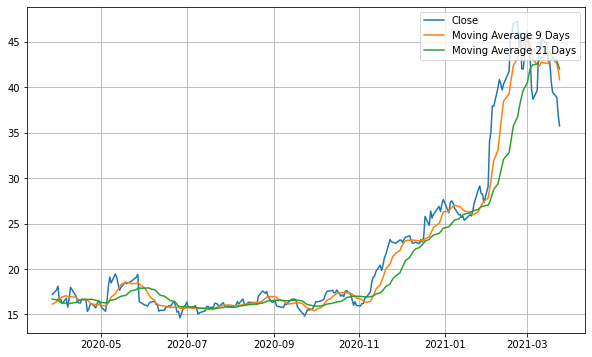

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][-300:-50],label='Close')
plt.plot(bomn['9-day'][-300:-50],label='Moving Average 9 Days')
plt.plot(bomn['21-day'][-300:-50],label='Moving Average 21 Days')
plt.legend(loc=1)

## Zoom in from the beginning to -200 days of the DataFrame

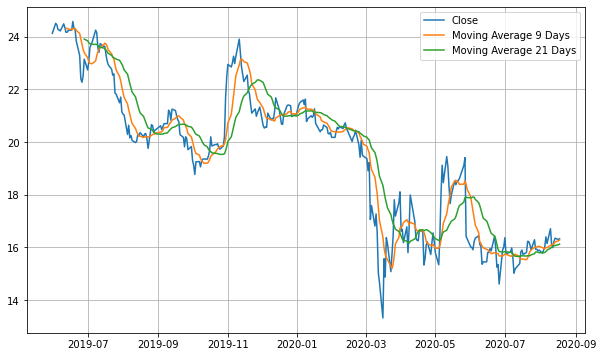

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][:-200],label='Close')
plt.plot(bomn['9-day'][:-200],label='Moving Average 9 Days')
plt.plot(bomn['21-day'][:-200:],label='Moving Average 21 Days')
plt.legend(loc=1)

In [7]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position-9-21'] = np.where(bomn['9-day'] > bomn['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position-9-21'] = np.where(bomn['9-day'] < bomn['21-day'],-1,bomn['position-9-21'])

<AxesSubplot:xlabel='Date'>

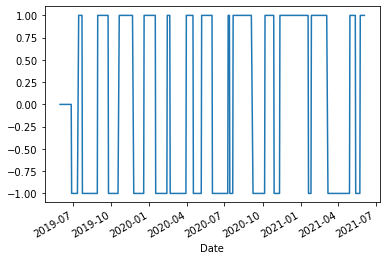

In [8]:
bomn['position-9-21'].plot()

<AxesSubplot:xlabel='Date'>

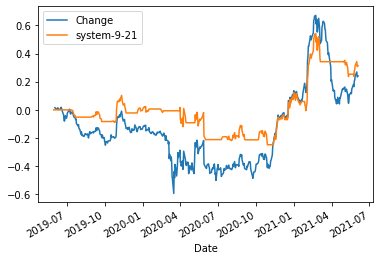

In [9]:
# Whether we are making money with this system
bomn['system-9-21'] = np.where(bomn['position-9-21'] > 0, bomn['position-9-21']* bomn['Change'],0)
bomn[['Change','system-9-21']].cumsum().plot()

In [10]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position-3-9'] = np.where(bomn['3-day'] > bomn['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position-3-9'] = np.where(bomn['3-day'] < bomn['9-day'],-1,bomn['position-3-9'])


<AxesSubplot:xlabel='Date'>

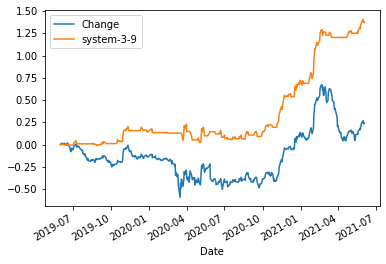

In [11]:
# Whether we are making money with this system
bomn['system-3-9'] = np.where(bomn['position-3-9'] > 0, bomn['position-3-9']* bomn['Change'],0)
bomn[['Change','system-3-9']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

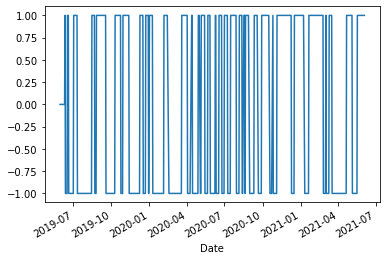

In [12]:
bomn['position-3-9'].plot()

In [13]:
bomn['position-3-9'].diff()[bomn['position-3-9'].diff() != 0].index.values

array(['2019-05-31T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-06-13T00:00:00.000000000', '2019-06-18T00:00:00.000000000',
       '2019-06-21T00:00:00.000000000', '2019-07-03T00:00:00.000000000',
       '2019-07-12T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
       '2019-09-19T00:00:00.000000000', '2019-10-11T00:00:00.000000000',
       '2019-10-25T00:00:00.000000000', '2019-10-30T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-12-10T00:00:00.000000000',
       '2019-12-18T00:00:00.000000000', '2019-12-24T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-02-18T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-13T00:00:00.000000000',
       '2020-04-15T00:00:00.000000000', '2020-04-29

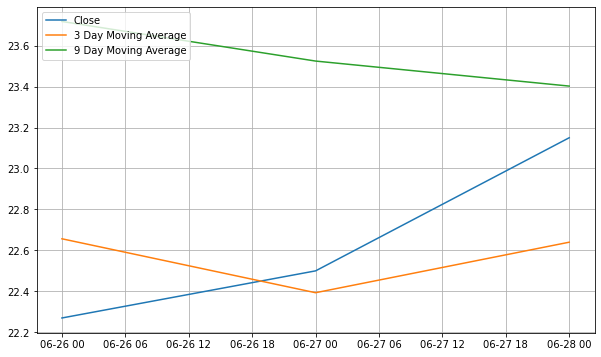

In [14]:
start = '2019-06-26'
finish = '2019-06-28'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][start:finish],label='Close')
plt.plot(bomn['3-day'][start:finish],label='3 Day Moving Average')
plt.plot(bomn['9-day'][start:finish],label='9 Day Moving Average')
plt.legend(loc=2)

## Calculate the Volitility

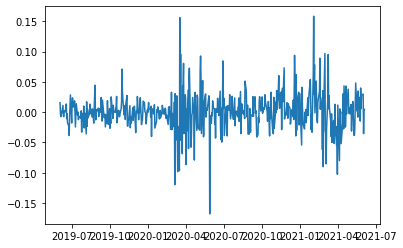

In [15]:
plt.plot(bomn.Change)

In [16]:
bomn['Volatility'] = bomn.Change.rolling(21).std().shift()

<AxesSubplot:xlabel='Date'>

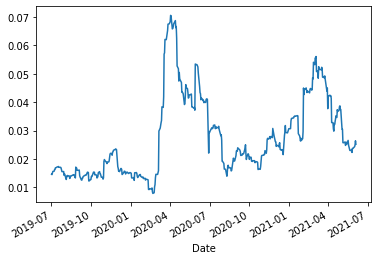

In [17]:
bomn.Volatility.plot()

## Prepare data for DGIM processing

In [18]:
bit_depth = 16
num_buckets = 5
bomn_list = bomn['Close'].tolist()
bomn_3day_list = bomn['3-day'].tolist()
bomn_9day_list = bomn['9-day'].tolist()
bomn_21day_list = bomn['21-day'].tolist()
bomn_list_bin = [ np.array(list(np.binary_repr(round(elem)).zfill(bit_depth))).astype(np.int8) for elem in bomn_list ]
print(bomn_list[0],bomn_list_bin[0], len(bomn_list_bin))

24.1299991607666 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0] 508


In [19]:
from ipynb.fs.full.DGIMMovingAverage import *

## 3, 9, 21 day moving average with DGIM

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
0 nan 8.0 nan
1 nan 16.333333333333332 nan
2 24.363333384195965 16.333333333333332 -32.959365306192225
3 24.410000483194988 16.333333333333332 -33.087533756593004
4 24.326667149861652 16.0 -34.2285570751068
5 24.25 16.0 -34.02061855670103
6 24.323333104451496 16.0 -34.21954165865621
7 24.35333315531413 16.0 -34.300574389716964
8 24.336666742960613 16.0 -34.25558163330644
9 24.230000178019207 16.0 -33.96615814095304
10 24.19333330790202 16.0 -33.8660787400714
11 24.21999994913737 16.0 -33.93889333773569
12 24.356666564941406 16.333333333333332 -32.9410151845521
13 24.383333206176758 16.333333333333332 -33.014353717662395
14 24.386666615804035 16.333333333333332 -33.023509975125734
15 24.140000025431316 16.0 -33.71996692980897
16 23.796667098999023 18.333333333333332 -22.95839893434278
17 23.18000030517578 17.666666666666668 -23.784873019514418
18 22.656667073567707 15.0 -33.794322212998054
19 22.393333435058594 14.666666666666666 -34.50431705846526
20 2

328 16.606666564941406 11.333333333333334 -31.75431511788578
329 16.320000012715656 11.0 -32.59803926820222
330 15.826666514078775 15.666666666666666 -1.0109510254087926
331 15.370000203450521 15.333333333333334 -0.23856128582845362
332 15.046666781107584 10.0 -33.54009797999992
333 15.009999910990397 10.0 -33.377747772816775
334 15.146666526794434 15.333333333333334 1.2323953010300122
335 15.379999796549479 15.666666666666666 1.8638938485649497
336 15.570000012715658 10.666666666666666 -31.492185883394693
337 15.736666679382324 10.666666666666666 -32.217750531363855
338 16.03000005086263 10.666666666666666 -33.458099608099154
339 16.263333002726238 10.666666666666666 -34.41278817276507
340 16.429999669392902 10.666666666666666 -35.07810784356026
341 16.486666361490887 11.0 -33.27941647625316
342 16.609999974568684 11.333333333333334 -31.768011133740956
343 16.856666564941406 11.333333333333334 -32.76646192370877
344 17.173333485921223 12.0 -30.124224223342228
345 17.46333376566569 12.

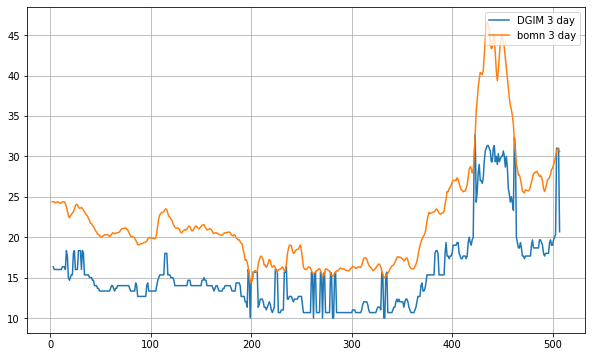

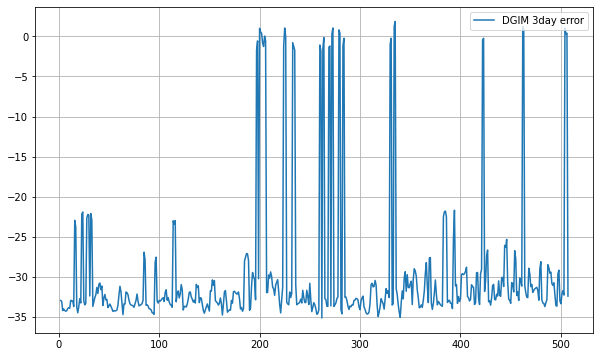

In [20]:
print(bomn_list_bin[0])
dgim_3day = DGIMMovingAverage(bomn_list_bin, 3, num_buckets, bit_depth, bomn_3day_list, False)
bomn['3-day-dgim'] = dgim_3day.mov_avg
bomn.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.mov_avg)), dgim_3day.mov_avg, label = "DGIM 3 day")
plt.plot(range(len(dgim_3day.mov_avg)), bomn_3day_list, label = "bomn 3 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.error)), dgim_3day.error, label = "DGIM 3day error")
plt.legend(loc=1)

0 nan 2.6666666666666665 nan
1 nan 5.444444444444445 nan
2 nan 5.444444444444445 nan
3 nan 8.11111111111111 nan
4 nan 10.777777777777779 nan
5 nan 13.444444444444445 nan
6 nan 13.444444444444445 nan
7 nan 16.11111111111111 nan
8 24.316666709052193 18.77777777777778 -22.778158690691317
9 24.321111255221897 18.77777777777778 -22.792270547481376
10 24.291111204359268 18.666666666666668 -23.154332012128126
11 24.268888897365994 18.666666666666668 -23.083966696585602
12 24.303333282470703 18.77777777777778 -22.735792825086875
13 24.309999889797634 18.77777777777778 -22.756981230352068
14 24.31444443596734 18.77777777777778 -22.771100827619165
15 24.242222256130642 18.77777777777778 -22.541021283520962
16 24.1244445376926 18.666666666666668 -22.623434344772466
17 23.92888895670573 18.444444444444443 -22.91976247699687
18 23.717777887980144 18.444444444444443 -22.233674117540993
19 23.524444580078125 18.22222222222222 -22.53920316718608
20 23.40222231547038 18.0 -23.084227825231626
21 23.1977

148 21.07166650560167 16.333333333333332 -22.48675096964307
149 21.148333019680447 16.333333333333332 -22.767750450431812
150 21.239444096883137 16.333333333333332 -23.09905448170261
151 21.300555335150825 16.444444444444443 -22.798048286997854
152 21.304444207085503 16.444444444444443 -22.81214058156328
153 21.328888575236004 16.555555555555557 -22.37966128822364
154 21.262222078111435 16.555555555555557 -22.136287097674487
155 21.252222061157227 16.555555555555557 -22.099649119448014
156 21.246666590372723 16.555555555555557 -22.079280130196043
157 21.235555436876083 16.555555555555557 -22.038509401047204
158 21.19333330790202 16.555555555555557 -21.883191685647905
159 21.16777780320909 16.555555555555557 -21.788882567325082
160 21.06888877020942 16.444444444444443 -21.94916104120194
161 20.954444249471027 16.333333333333332 -22.05313040575796
162 20.82555537753635 16.11111111111111 -22.63778411168094
163 20.791110780504013 16.11111111111111 -22.509618263307868
164 20.76555527581109 

306 16.251110712687176 12.555555555555555 -22.7403235536788
307 16.285555097791885 12.555555555555555 -22.903729838119368
308 16.275555080837673 12.555555555555555 -22.856360393274258
309 16.274443944295246 12.555555555555555 -22.851093416578998
310 16.305555131700302 12.555555555555555 -22.998294420864077
311 16.466666327582466 12.777777777777779 -22.402157646357477
312 16.63111072116428 12.88888888888889 -22.501334366760876
313 16.75555525885688 12.88888888888889 -23.076921714809156
314 16.88666640387641 13.11111111111111 -22.35820381871584
315 16.954444249471027 13.222222222222221 -22.013237192161284
316 16.952221976386177 13.222222222222221 -22.003013878414926
317 16.963333129882812 13.222222222222221 -22.054102687343942
318 17.0011109246148 13.222222222222221 -22.22730455173592
319 16.88444423675537 13.11111111111111 -22.347985357019777
320 16.69444423251682 12.88888888888889 -22.795340118095158
321 16.505555470784504 12.88888888888889 -21.91181380291781
322 16.377777735392254 12.

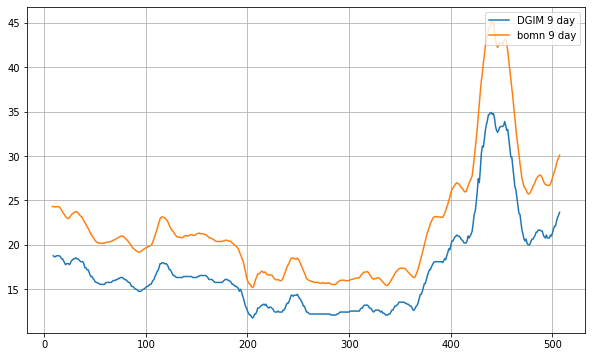

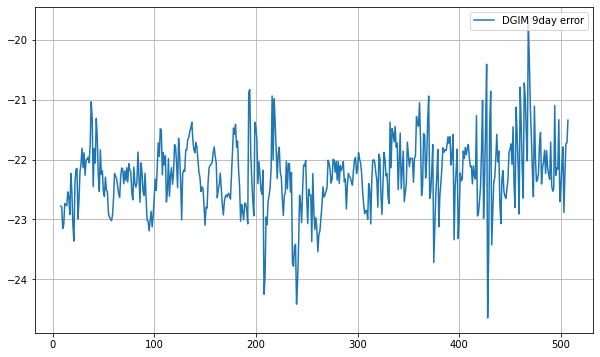

In [21]:
dgim_9day = DGIMMovingAverage(bomn_list_bin, 9, num_buckets, bit_depth, bomn_9day_list, False)
bomn['9-day-dgim'] = dgim_9day.mov_avg
bomn.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.mov_avg)), dgim_9day.mov_avg, label = "DGIM 9 day")
plt.plot(range(len(dgim_9day.mov_avg)), bomn_9day_list, label = "bomn 9 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.error)), dgim_9day.error, label = "DGIM 9day error")
plt.legend(loc=1)

0 nan 1.1428571428571428 nan
1 nan 2.3333333333333335 nan
2 nan 2.3333333333333335 nan
3 nan 3.4761904761904763 nan
4 nan 4.619047619047619 nan
5 nan 5.761904761904762 nan
6 nan 5.761904761904762 nan
7 nan 6.904761904761905 nan
8 nan 8.047619047619047 nan
9 nan 9.19047619047619 nan
10 nan 10.333333333333334 nan
11 nan 11.476190476190476 nan
12 nan 12.666666666666666 nan
13 nan 13.80952380952381 nan
14 nan 12.666666666666666 nan
15 nan 13.80952380952381 nan
16 nan 14.857142857142858 nan
17 nan 15.904761904761905 nan
18 nan 16.666666666666668 nan
19 nan 17.714285714285715 nan
20 23.910952431815012 18.80952380952381 -21.335112588419662
21 23.844761984688894 18.761904761904763 -21.316451915300792
22 23.775238127935502 19.142857142857142 -19.484057152871962
23 23.734761919294083 19.142857142857142 -19.346748840586276
24 23.71238090878441 19.142857142857142 -19.27062399809231
25 23.711904707409087 19.142857142857142 -19.269002726399652
26 23.708571388607933 19.142857142857142 -19.25765231027

180 20.453333173479354 16.523809523809526 -19.21214315701371
181 20.42809513636998 16.476190476190474 -19.345438885995655
182 20.421904700142996 16.476190476190474 -19.320990289044357
183 20.42095238821847 16.476190476190474 -19.31722789924265
184 20.392857142857142 16.476190476190474 -19.206071220081736
185 20.334285736083984 16.38095238095238 -19.44171241833324
186 20.31142861502511 16.333333333333332 -19.585502118492226
187 20.272381010509672 16.333333333333332 -19.430611900665475
188 20.231904801868257 16.285714285714285 -19.504789859378803
189 20.18428575424921 16.142857142857142 -20.022648611884932
190 20.123809541974747 16.095238095238095 -20.018930502864066
191 20.078571410406205 16.047619047619047 -20.075892255452096
192 19.91904758271717 15.904761904761905 -20.153000093429533
193 19.777619043986004 16.142857142857142 -18.37815711307334
194 19.601904732840403 16.0 -18.37527924929605
195 19.443809509277344 15.80952380952381 -18.691222509763247
196 19.25619043622698 15.619047619

388 22.191904885428293 18.095238095238095 -18.460185420496114
389 22.36142876034691 18.285714285714285 -18.22653873468055
390 22.527619225638254 18.142857142857142 -19.463939082346073
391 22.64857155936105 18.285714285714285 -19.263277872566402
392 22.82190486363002 18.428571428571427 -19.25051156470291
393 23.077619189307804 18.333333333333332 -20.55795191460897
394 23.247142973400297 18.523809523809526 -20.31790940932086
395 23.4742857615153 18.714285714285715 -20.27750746322311
396 23.586190541585285 18.857142857142858 -20.050069875016693
397 23.73000008719308 19.0 -19.932575094029723
398 23.917619069417317 19.19047619047619 -19.764270286357938
399 24.084285736083984 19.428571428571427 -19.330921242713835
400 24.273333322434198 19.61904761904762 -19.174481071723825
401 24.48666663396926 19.857142857142858 -18.906304586203134
402 24.641428538731166 20.0 -18.835874435752828
403 24.833333333333332 20.19047619047619 -18.6960690316395
404 25.023809523809526 20.38095238095238 -18.55375832

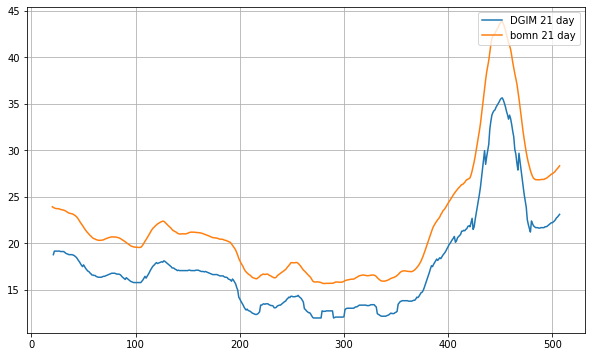

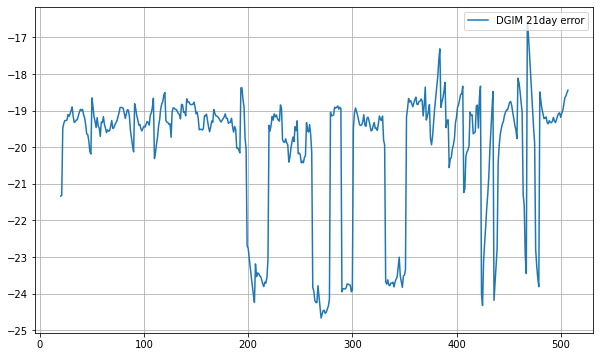

In [22]:
dgim_21day = DGIMMovingAverage(bomn_list_bin, 21, num_buckets, bit_depth, bomn_21day_list, False)
bomn['21-day-dgim'] = dgim_21day.mov_avg
bomn.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.mov_avg, label = "DGIM 21 day")
plt.plot(range(len(dgim_21day.mov_avg)), bomn_21day_list, label = "bomn 21 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.error, label = "DGIM 21day error")
plt.legend(loc=1)

In [23]:
bomn.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change,position-9-21,system-9-21,position-3-9,system-3-9,Volatility,3-day-dgim,9-day-dgim,21-day-dgim
Date,,,,,,,,,,,,,,,,,
2021-05-28,30.680000,29.540001,30.070000,30.660000,95600,30.029999,28.673333,27.750952,0.028451,1,0.028451,1,0.028451,0.023716,20.333333,22.111111,22.523810
2021-06-01,31.740000,30.530001,31.000000,31.590000,112900,30.683333,29.150000,27.920952,0.029882,1,0.029882,1,0.029882,0.024340,31.000000,22.666667,22.714286
2021-06-02,31.799999,30.230000,31.799999,30.490000,193600,30.913333,29.528889,28.021428,-0.035442,1,-0.035442,1,-0.035442,0.024910,31.000000,23.111111,22.809524
2021-06-03,30.590000,29.799999,30.299999,30.559999,63400,30.880000,29.808889,28.166666,0.002293,1,0.002293,1,0.002293,0.026404,31.000000,23.333333,22.952381
2021-06-04,31.219999,30.565001,31.000000,30.700001,89800,30.583333,30.087777,28.317143,0.004571,1,0.004571,1,0.004571,0.025197,20.666667,23.666667,23.095238


## 9/21 DGIM Comparison

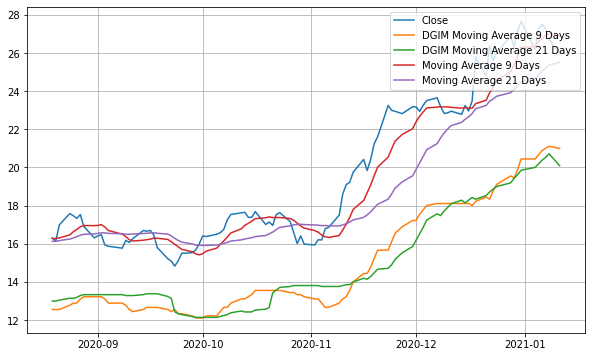

In [24]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][-200:-100],label='Close')
plt.plot(bomn['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(bomn['21-day-dgim'][-200:-100],label='DGIM Moving Average 21 Days')
plt.plot(bomn['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(bomn['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

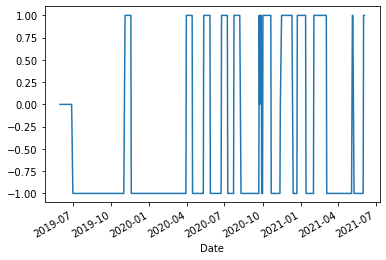

In [25]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position-dgim-9-21'] = np.where(bomn['9-day-dgim'] > bomn['21-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position-dgim-9-21'] = np.where(bomn['9-day-dgim'] < bomn['21-day-dgim'],-1,bomn['position-dgim-9-21'])
bomn['position-dgim-9-21'].plot()

,Change,system-dgim-9-21
Date,,
2021-05-28,0.239503,0.407196
2021-06-01,0.269385,0.407196
2021-06-02,0.233943,0.371754
2021-06-03,0.236236,0.374047
2021-06-04,0.240807,0.378618


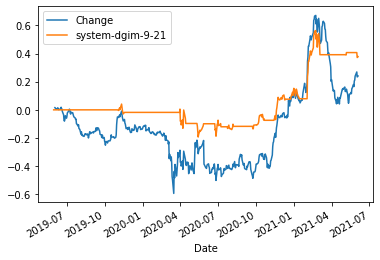

In [26]:
# Whether we are making money with this system
bomn['system-dgim-9-21'] = np.where(bomn['position-dgim-9-21'] > 0, bomn['position-dgim-9-21']* bomn['Change'],0)
bomn[['Change','system-dgim-9-21']].cumsum().plot()
bomn[['Change','system-dgim-9-21']].cumsum().tail()

,system-9-21,system-dgim-9-21
Date,,
2021-05-28,0.312911,0.407196
2021-06-01,0.342793,0.407196
2021-06-02,0.307351,0.371754
2021-06-03,0.309644,0.374047
2021-06-04,0.314215,0.378618


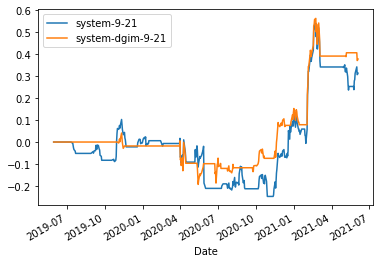

In [27]:
bomn[['system-9-21','system-dgim-9-21']].cumsum().plot()
bomn[['system-9-21','system-dgim-9-21']].cumsum().tail()

## 3/9 DGIM comparison

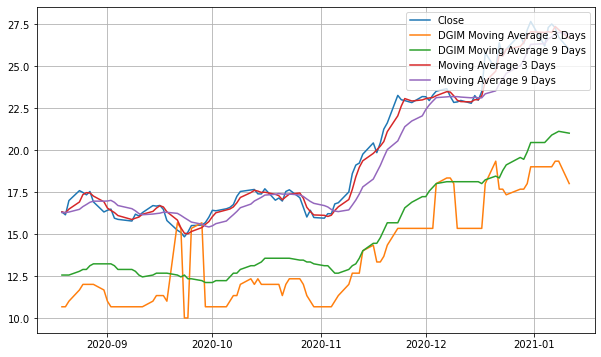

In [28]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][-200:-100],label='Close')
plt.plot(bomn['3-day-dgim'][-200:-100],label='DGIM Moving Average 3 Days')
plt.plot(bomn['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(bomn['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(bomn['9-day'][-200:-100],label='Moving Average 9 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

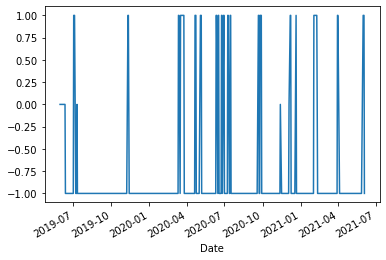

In [29]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position-dgim-3-9'] = np.where(bomn['3-day-dgim'] > bomn['9-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position-dgim-3-9'] = np.where(bomn['3-day-dgim'] < bomn['9-day-dgim'],-1,bomn['position-dgim-3-9'])
bomn['position-dgim-3-9'].plot()

,Change,system-dgim-3-9
Date,,
2021-05-28,0.239503,0.449189
2021-06-01,0.269385,0.479070
2021-06-02,0.233943,0.443628
2021-06-03,0.236236,0.445922
2021-06-04,0.240807,0.445922


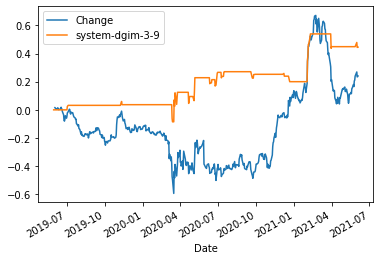

In [30]:
# Whether we are making money with this system
bomn['system-dgim-3-9'] = np.where(bomn['position-dgim-3-9'] > 0, bomn['position-dgim-3-9']* bomn['Change'],0)
bomn[['Change','system-dgim-3-9']].cumsum().plot()
bomn[['Change','system-dgim-3-9']].cumsum().tail()

,system-3-9,system-dgim-3-9
Date,,
2021-05-28,1.377641,0.449189
2021-06-01,1.407523,0.479070
2021-06-02,1.372081,0.443628
2021-06-03,1.374374,0.445922
2021-06-04,1.378945,0.445922


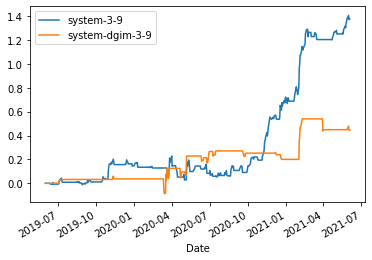

In [31]:
bomn[['system-3-9','system-dgim-3-9']].cumsum().plot()
bomn[['system-3-9','system-dgim-3-9']].cumsum().tail()

## Pandas 9/21 vs DGIM 3/9

,system-9-21,system-dgim-3-9
Date,,
2021-05-28,0.312911,0.449189
2021-06-01,0.342793,0.479070
2021-06-02,0.307351,0.443628
2021-06-03,0.309644,0.445922
2021-06-04,0.314215,0.445922


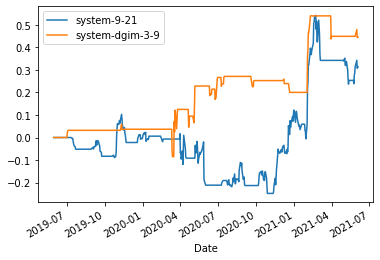

In [32]:
bomn[['system-9-21','system-dgim-3-9']].cumsum().plot()
bomn[['system-9-21','system-dgim-3-9']].cumsum().tail()

## Normalizing DGIM

<AxesSubplot:xlabel='Date'>

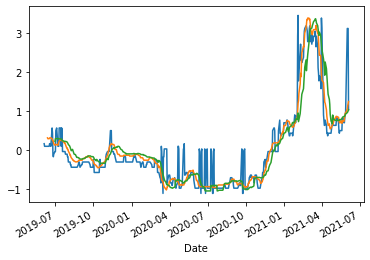

In [33]:
from sklearn import preprocessing

df3 = bomn['3-day-dgim']
df9 = bomn['9-day-dgim']
df21 = bomn['21-day-dgim']

bomn['3-day-dgim-norm']=(df3-df3.mean())/df3.std()
bomn['9-day-dgim-norm']=(df9-df9.mean())/df9.std()
bomn['21-day-dgim-norm']=(df21-df21.mean())/df21.std()

bomn['3-day-dgim-norm'].plot()
bomn['9-day-dgim-norm'].plot()
bomn['21-day-dgim-norm'].plot()

<AxesSubplot:xlabel='Date'>

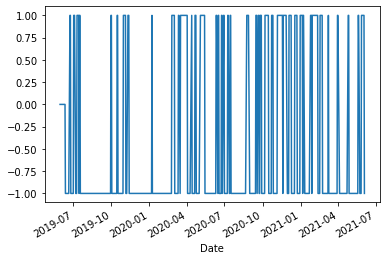

In [34]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position-dgim-3-9-norm'] = np.where(bomn['3-day-dgim-norm'] > bomn['9-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position-dgim-3-9-norm'] = np.where(bomn['3-day-dgim-norm'] < bomn['9-day-dgim-norm'],-1,bomn['position-dgim-3-9-norm'])
bomn['position-dgim-3-9-norm'].plot()

,Change,system-dgim-3-9-norm
Date,,
2021-05-28,0.239503,1.071611
2021-06-01,0.269385,1.101493
2021-06-02,0.233943,1.066051
2021-06-03,0.236236,1.068344
2021-06-04,0.240807,1.068344


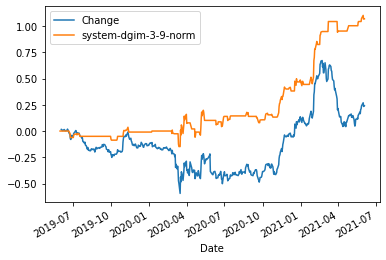

In [35]:
# Whether we are making money with this system
bomn['system-dgim-3-9-norm'] = np.where(bomn['position-dgim-3-9-norm'] > 0, bomn['position-dgim-3-9-norm']* bomn['Change'],0)
bomn[['Change','system-dgim-3-9-norm']].cumsum().plot()
bomn[['Change','system-dgim-3-9-norm']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-3-9
Date,,
2021-05-28,1.071611,0.449189
2021-06-01,1.101493,0.479070
2021-06-02,1.066051,0.443628
2021-06-03,1.068344,0.445922
2021-06-04,1.068344,0.445922


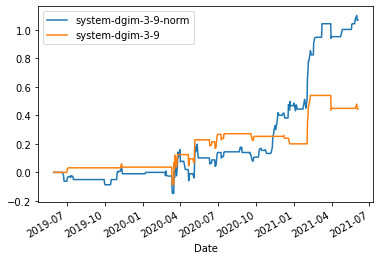

In [36]:
bomn[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().plot()
bomn[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().tail()

,system-dgim-3-9-norm,system-3-9
Date,,
2021-05-28,1.071611,1.377641
2021-06-01,1.101493,1.407523
2021-06-02,1.066051,1.372081
2021-06-03,1.068344,1.374374
2021-06-04,1.068344,1.378945


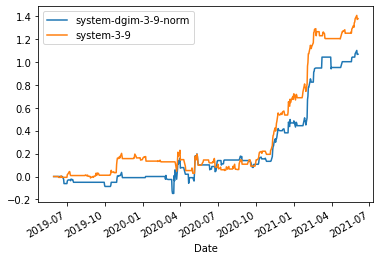

In [37]:
bomn[['system-dgim-3-9-norm','system-3-9']].cumsum().plot()
bomn[['system-dgim-3-9-norm','system-3-9']].cumsum().tail()

<AxesSubplot:xlabel='Date'>

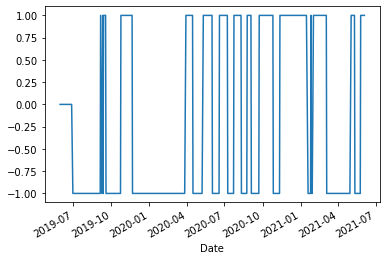

In [38]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position-dgim-9-21-norm'] = np.where(bomn['9-day-dgim-norm'] > bomn['21-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position-dgim-9-21-norm'] = np.where(bomn['9-day-dgim-norm'] < bomn['21-day-dgim-norm'],-1,bomn['position-dgim-9-21-norm'])
bomn['position-dgim-9-21-norm'].plot()

,Change,system-dgim-9-21-norm
Date,,
2021-05-28,0.239503,0.600897
2021-06-01,0.269385,0.630779
2021-06-02,0.233943,0.595337
2021-06-03,0.236236,0.597631
2021-06-04,0.240807,0.602201


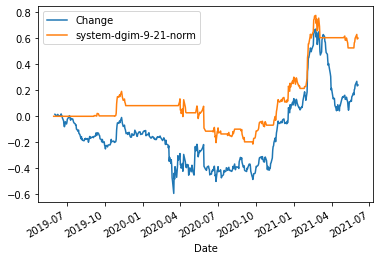

In [39]:
# Whether we are making money with this system
bomn['system-dgim-9-21-norm'] = np.where(bomn['position-dgim-9-21-norm'] > 0, bomn['position-dgim-9-21-norm']* bomn['Change'],0)
bomn[['Change','system-dgim-9-21-norm']].cumsum().plot()
bomn[['Change','system-dgim-9-21-norm']].cumsum().tail()

,system-dgim-9-21-norm,system-dgim-9-21
Date,,
2021-05-28,0.600897,0.407196
2021-06-01,0.630779,0.407196
2021-06-02,0.595337,0.371754
2021-06-03,0.597631,0.374047
2021-06-04,0.602201,0.378618


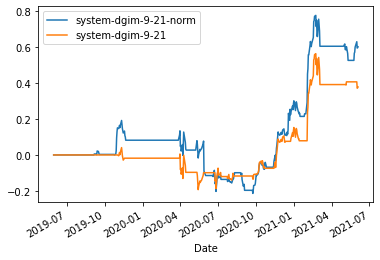

In [40]:
bomn[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().plot()
bomn[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().tail()

,system-dgim-9-21-norm,system-9-21
Date,,
2021-05-28,0.600897,0.312911
2021-06-01,0.630779,0.342793
2021-06-02,0.595337,0.307351
2021-06-03,0.597631,0.309644
2021-06-04,0.602201,0.314215


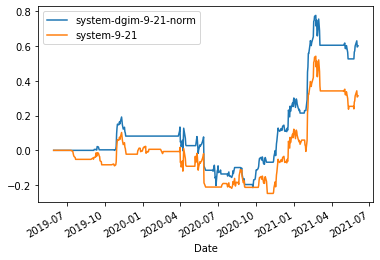

In [41]:
bomn[['system-dgim-9-21-norm','system-9-21']].cumsum().plot()
bomn[['system-dgim-9-21-norm','system-9-21']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-9-21-norm
Date,,
2021-05-28,1.071611,0.600897
2021-06-01,1.101493,0.630779
2021-06-02,1.066051,0.595337
2021-06-03,1.068344,0.597631
2021-06-04,1.068344,0.602201


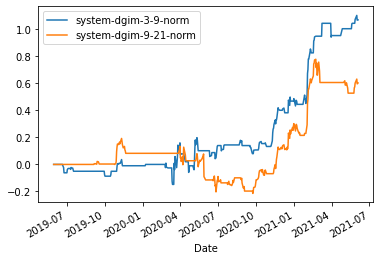

In [42]:
bomn[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().plot()
bomn[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().tail()

## Winning Method: 3-9 Moving Average
### Runner Up: 3-9 Normalized DGIM Moving Average

,Change,system-dgim-3-9-norm,system-3-9,system-dgim-9-21-norm,system-9-21
Date,,,,,
2021-05-28,0.239503,1.071611,1.377641,0.600897,0.312911
2021-06-01,0.269385,1.101493,1.407523,0.630779,0.342793
2021-06-02,0.233943,1.066051,1.372081,0.595337,0.307351
2021-06-03,0.236236,1.068344,1.374374,0.597631,0.309644
2021-06-04,0.240807,1.068344,1.378945,0.602201,0.314215


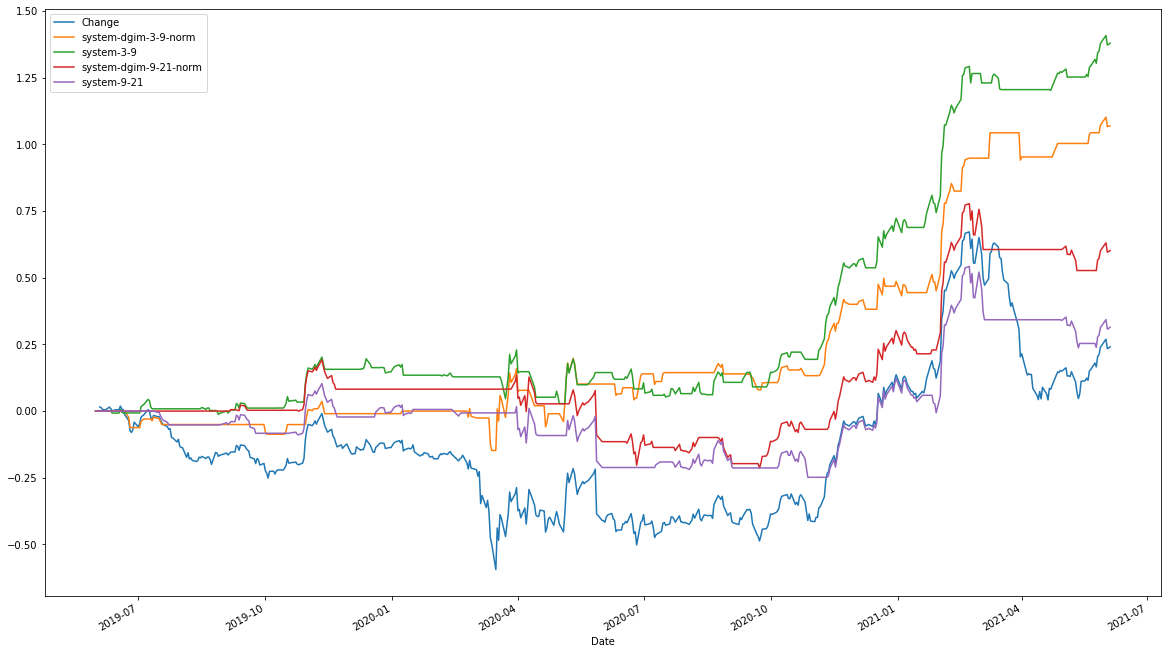

In [43]:
bomn[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().plot(figsize=(20,12))
bomn[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().tail()